# Intro to Plotting and Fitting

In [1]:
import qexpy as q
import qexpy.plotting as plt

The plotting module of QExPy is a wrapper for matplotlib.pyplot, developed to interface with QExPy data structures.

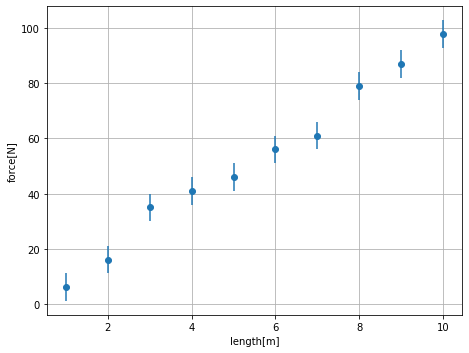

In [2]:
# let's start by creating some arrays of measurement
xdata = q.MeasurementArray(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], unit="m", name="length")
ydata = q.MeasurementArray(
    [6, 16, 35, 41, 46, 56, 61, 79, 87, 98], error=5, unit="N", name="force")

# now we can add them to a simple plot
plt.plot(xdata, ydata, name="first")
# use `figure = plt.plot(xdata, ydata)` to obtain the Plot object instance for further 
# customization. qexpy.plotting keeps a buffer of the latest Plot instance, if you did 
# not assign the return value of plt.plot to anything (like what we are doing here), you 
# can still retrieve the Plot instance using `figure = plt.get_plot()`, as shown below.

# draw the plot to the screen
plt.show()

As you can see in the plot above, the name and units of the data that's passed in are automatically added to the plot as axis labels. For simple plotting purposes, this is enough. However, if you wish to further customize the plot, you can try to operate directly on the plot object. You will be able to change the title as well as the axis labels yourself. You can also add error bars and legends to the plot.

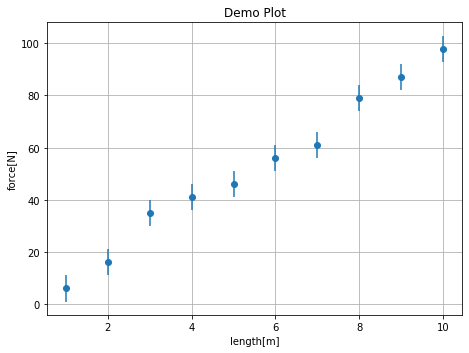

In [3]:
# retrieve the current plot object
figure = plt.get_plot()

# As you can see, the error bars are automatically on. 
# If not, we can manually add error bars to the plot
figure.error_bars()  # use `figure.error_bars(false)` to turn off error bars

# we can add a title to the plot
figure.title = "Demo Plot"

# finally draw the plot
figure.show()

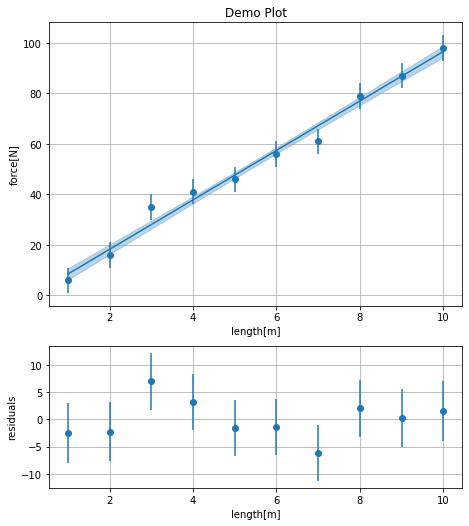

----------------- Fit Results -------------------
Fit of first to linear

Result Parameter List: 
slope = 9.79 +/- 0.42,
intercept = -1.3 +/- 2.6

Correlation Matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 4.75/7

--------------- End Fit Results -----------------


In [4]:
# We can try to add a fit to the plot. The fit function automatically selects the last
# applicable fit target (a data set or a histogram) on the plot.
result = figure.fit(model=q.FitModel.LINEAR)

# also add a residuals subplot
figure.residuals()

# show the plot and the result
figure.show()
print(result)

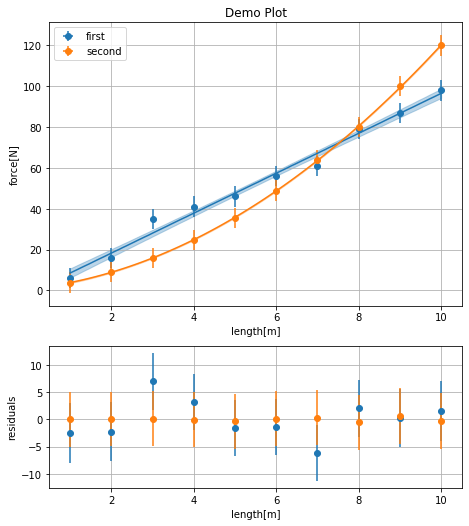

In [5]:
# we can add multiple datasets to plot
figure.plot(xdata=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ydata=[3.8, 8.9, 16, 24.8, 35.5, 48.9, 64, 80, 100, 120],
            xerr=0.05, yerr=5, name="second")

# we can also add a line of best fit to the plot
figure.fit(model=q.FitModel.QUADRATIC)

# we can add turn on legends for the plot since we now have 2 data sets
figure.legend()

# now show the figure
figure.show()

## The Fitting Module

The QExPy fitting module supports a few pre-set fit models, as well as any custom fit function the user wish to use. The available pre-set models include linear fit, quadratic fit, general polynomial fit, exponential fit, and gaussian fit. The pre-set models are stored under q.FitModel, To select the fit model, if you're in a Jupyter Notebook environment, simply type "q.FitModel.", and press TAB, the available options will appear as a list of autofill suggestions

In [6]:
# We can do a simple quadratic fit. 
result = q.fit(
    xdata=[1,2,3,4,5,6,7,8,9,10], xerr=0.5, 
    ydata=[3.86,8.80,16.11,24.6,35.71,48.75,64,81.15,99.72,120.94], 
    yerr=0.5, model=q.FitModel.QUADRATIC)  # or simply type "quadratic"

print(result)

----------------- Fit Results -------------------
Fit of XY Dataset to quadratic

Result Parameter List: 
a = 1.0036 +/- 0.0088,
b = 1.971 +/- 0.099,
c = 0.89 +/- 0.24

Correlation Matrix: 
[[ 1.    -0.975  0.814]
 [-0.975  1.    -0.909]
 [ 0.814 -0.909  1.   ]]

chi2/ndof = 1.13/6

--------------- End Fit Results -----------------


The parameters of polynomials are organized from highest to lowest power terms. The result above indicates that the function of best fit is 1.004x^2 + 2x + 0.9

The QExPy fit function is very flexible in accepting fit arguments. The three accepted ways to specify the fit data set are:
1. Create an XYDataSet object and pass the dataset into the fit function
2. Pass in a MeasurementArray object for each of xdata and ydata
3. Pass in two Python lists or numpy arrays for xdata and ydata, specify the xerr or yerr if applicable

In [7]:
# The traditionoal way (with previous versions of QExPy) of fitting
xydata = q.XYDataSet(
    xdata=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], xname='length', xunit='m',
    ydata=[0.6, 1.6, 3.5, 4.1, 4.6, 5.6, 6.1, 7.9, 8.7, 9.8], yerr=0.5, 
    yname='force', yunit='N')

# the fit function can be called directly from the data set
result = xydata.fit("linear")

print(result)

----------------- Fit Results -------------------
Fit of XY Dataset to linear

Result Parameter List: 
slope = 0.979 +/- 0.042,
intercept = -0.13 +/- 0.26

Correlation Matrix: 
[[ 1.    -0.886]
 [-0.886  1.   ]]

chi2/ndof = 4.75/7

--------------- End Fit Results -----------------


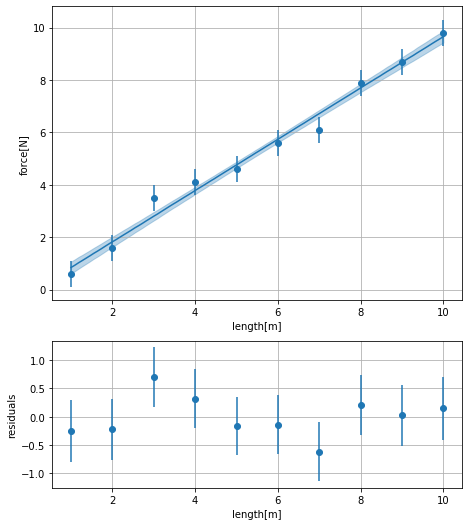

In [8]:
# You can very easily add a dataset and its fit function to a plot
figure = plt.plot(xydata)
figure.plot(result)

# turn on residuals and error bars
figure.error_bars()
figure.residuals()

# show the figure
figure.show()

In [9]:
# You can access the fit parameters easily by indexing the result instance:
slope = result[0]
intercept = result[1]

# these are both ExperimentalValue instances
print(slope)
print(intercept)

slope = 0.979 +/- 0.042
intercept = -0.13 +/- 0.26


In [10]:
# QExPy also supports fitting with higher order polynomials. The degree of a polynomial 
# is the degree of the highest order term. e.g. a quadratic function would be degree-2
result = q.fit(
    xdata=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ydata=[3.89, 18.01, 58.02, 135.92, 264.01, 453.99, 718.02, 1067.98, 1516.01, 2074], 
    model=q.FitModel.POLYNOMIAL, degree=3)

print(result)

----------------- Fit Results -------------------
Fit of XY Dataset to polynomial

Result Parameter List: 
coeffs_0 = 2.00061 +/- 0.00080,
coeffs_1 = 0.988 +/- 0.013,
coeffs_2 = -2.928 +/- 0.064,
coeffs_3 = 3.860 +/- 0.086

Correlation Matrix: 
[[ 1.    -0.989  0.941 -0.795]
 [-0.989  1.    -0.979  0.859]
 [ 0.941 -0.979  1.    -0.935]
 [-0.795  0.859 -0.935  1.   ]]

chi2/ndof = 0.00/5

--------------- End Fit Results -----------------


### Advanced Fitting

QExPy supports fitting a custom function to a data set. With any non-polynomial fit models, a list of guesses for the fit parameters needs to be supplied under the keyword argument "parguess". Other optional keyword arguments to the fit function includes "parnames" and "parunits", which are the names and units assigned to the fit parameters, which will show up in the fit results.

In [11]:
# First define a fit model
def func(x, a, b):
    return a * q.sin(b * x)

# Apply it to the test dataset
result = q.fit(
    xdata=[0.00,0.33,0.66,0.99,1.32,1.65,1.98,2.31,2.64,2.97,3.31,3.64,3.97,4.30,
           4.63,4.96,5.29,5.62,5.95,6.28],
    ydata=[0.09,0.41,1.53,2.23,3.76,2.50,3.89,5.33,5.39,4.05,5.08,5.84,4.59,4.50,
           3.48,3.57,2.20,1.95,0.39,-0.18],
    model=func, parguess=[1, 1], parnames=["mass", "length"], parunits=["kg", "m"])

print(result)

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
mass = 5.10 +/- 0.19 [kg],
length = 0.5005 +/- 0.0088 [m]

Correlation Matrix: 
[[1.    0.238]
 [0.238 1.   ]]

chi2/ndof = 0.00/17

--------------- End Fit Results -----------------


In [12]:
# The QExPy fitting module also has this little feature implemented, where if you leave
# the "parname" field empty, parameter names will be extracted from the signature.

def func(x, mass, length):  # define the fit function with the names you want
    return mass * q.sin(length * x)

# try the same fit again
result = q.fit(
    xdata=[0.00,0.33,0.66,0.99,1.32,1.65,1.98,2.31,2.64,2.97,3.31,3.64,3.97,4.30,
           4.63,4.96,5.29,5.62,5.95,6.28],
    ydata=[0.09,0.41,1.53,2.23,3.76,2.50,3.89,5.33,5.39,4.05,5.08,5.84,4.59,4.50,
           3.48,3.57,2.20,1.95,0.39,-0.18],
    model=func, parguess=[1, 1], parunits=["kg", "m"])

print(result)

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
mass = 5.10 +/- 0.19 [kg],
length = 0.5005 +/- 0.0088 [m]

Correlation Matrix: 
[[1.    0.238]
 [0.238 1.   ]]

chi2/ndof = 0.00/17

--------------- End Fit Results -----------------


## The Plotting Module

The plotting module is centered around the Plot class. It is a data structure that holds all the objects to be plotted (data sets, functions, histograms, etc.). When calling the QExPy plot function, a Plot object will be created and returned. The user can add objects to the plot using the same plot function called from the Plot instance. The module also keeps a reference to the last Plot object being operated on, and if the return value of a call to the plot function is not assigned to any variable, by default, the object will be added to the current buffered plot.

### Plotting Data Sets and Functions

The QExPy plotting function takes the same types of inputs as the fit function for plotting data sets.

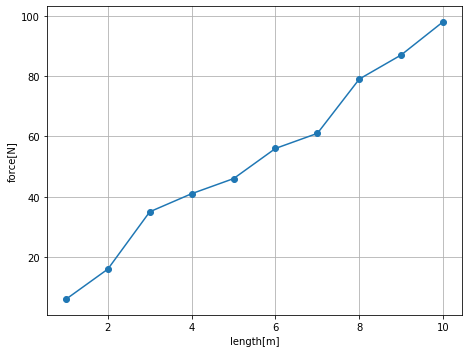

In [13]:
xydata = q.XYDataSet(
    xdata=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], xname='length', xunit='m',
    ydata=[6, 16, 35, 41, 46, 56, 61, 79, 87, 98], yerr=0.5, 
    yname='force', yunit='N')

# You can specify the format string of the plot object. The default for data sets is
# dots, but if you want them connected in a line, you can use the fmt option
figure = plt.plot(xydata, "-o")

figure.show()

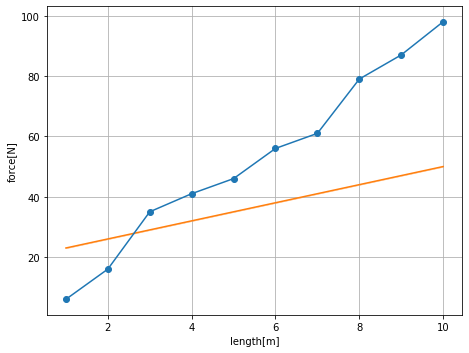

In [14]:
# You can also add callable functions to a Plot

def func(x):
    return 20 + x * 3

figure.plot(func)

figure.show()

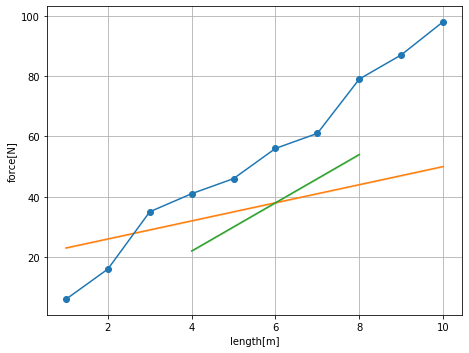

In [15]:
# You can also plot a function with parameters
def func2(x, *pars):
    return pars[0] + x * pars[1]

# You can specify an xrange for the plot, and also when plotting a function with 
# parameters, you have to specify the parameters values too.
figure.plot(func2, xrange=(4,8), pars=[-10,8])

figure.show()

### Plotting Histograms

The QExPy plotting module is also capable of plotting histograms.

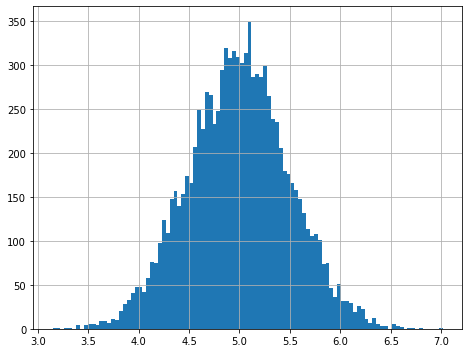

In [16]:
# first let's generate a bunch of random numbers
import numpy as np
samples = np.random.normal(5, 0.5, 10000)

# Let's plot it out as a histogram. Note that the return values include the array
# of counts, the bin edges, followed by the Plot object.
n, bins, figure = plt.hist(samples, bins=100)

figure.show()

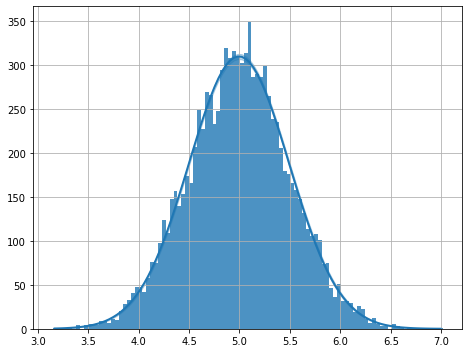

----------------- Fit Results -------------------
Fit of histogram to gaussian

Result Parameter List: 
normalization = 385.3 +/- 3.8,
mean = 4.9952 +/- 0.0056,
std = 0.4968 +/- 0.0056

Correlation Matrix: 
[[ 1.000e+00 -4.535e-06  5.774e-01]
 [-4.535e-06  1.000e+00 -7.413e-06]
 [ 5.774e-01 -7.413e-06  1.000e+00]]

chi2/ndof = 0.00/96

--------------- End Fit Results -----------------


In [17]:
# now let's try adding a fit to the histogram
result = figure.fit(model=q.FitModel.GAUSSIAN, parguess=[100, 5, 0.5])

figure.show()
print(result)